# Restauração de Imagens

## Bibliotecas utilizadas

In [244]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import restoration
from math import sqrt, ceil
from scipy.signal import convolve2d

## Funções

### Raíz do erro médio quadrático (RMSE)

In [245]:
def RMSE(image, corrupt_image):
  errors = []
  N = image.shape[0] * image.shape[1]
  sum = 0
  for i in range(len(image)):
    for j in range(len(image[i])):
      error = (int(image[i][j]) - int(corrupt_image[i][j]))**2
      sum += error
      errors.append(error)
  square_root = sqrt(sum)
  rmse = square_root/N
  return rmse

### Geração do kernel gaussiano

In [246]:
def gaussian_filter(k=5, sigma=2.0):
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

### Geração da Point Spread Function

In [247]:
def generate_psf(image, kernel_size, sigma, noise_coefficient):
  psf = gaussian_filter(k=kernel_size, sigma=sigma)
  conv = convolve2d(image, psf, 'same')
  rng = np.random.default_rng()
  noised = conv + 0.1 * conv.std() * rng.standard_normal(conv.shape)
  return noised, psf

### Aplicação da RMSE para cada imagem resultante da aplicação do filtro de Wiener

In [248]:
def RMSE_evaluation(original_image, restored_images):
  return [RMSE(original_image, cv2.normalize(restored_image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)) for restored_image in restored_images]

## Estimativa dos parâmetros

## Imagem original

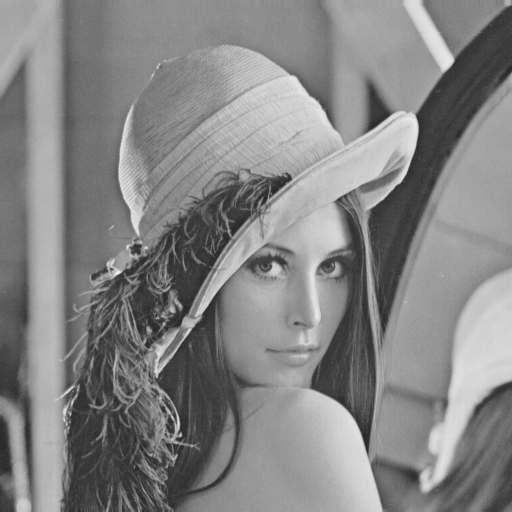

In [249]:
image = cv2.imread('lena.png', 0)
image = image/255.0
cv2_imshow(image*255.0)

### Imagem borrada

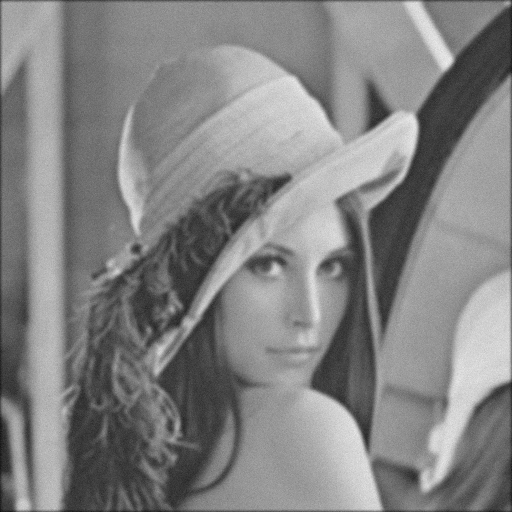

In [250]:
noised, psf = generate_psf(image, kernel_size=7, sigma=2.0, noise_coefficient=0.1)
cv2_imshow(noised*255.0)

In [255]:
restored_image = restoration.wiener(noised, psf, balance = 0.1)

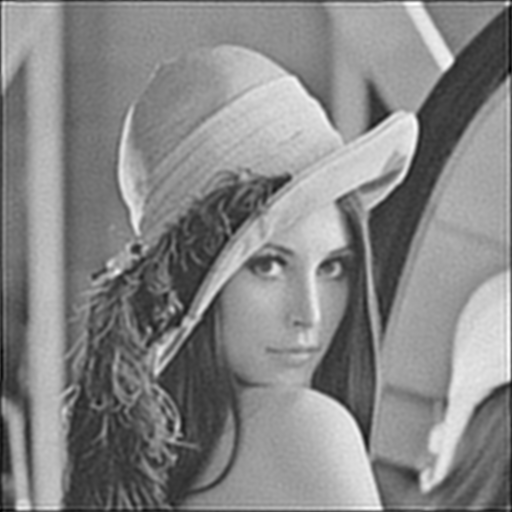

0.27770970478150847


In [256]:
result = cv2.normalize(restored_image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2_imshow(result)

In [257]:
balance_values = [1100, 1, 0.1, 0.01, 0.001]
restored_images = [restoration.wiener(noised, psf, balance=b) for b in balance_values]
print(RMSE_evaluation(image, restored_images))

[0.25940970776273126, 0.26553697291073247, 0.27770970478150847, 0.2881568675139121, 0.3177348851668394]
